# Tarea 3 - Ejercicio 2

## Alumno: Marcelo Alberto Sanchez Zaragoza

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
from sklearn.metrics.pairwise import rbf_kernel
from sklearn.metrics.pairwise import pairwise_kernels
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import cm

sns.set()
%matplotlib inline
%load_ext autoreload
%autoreload 2

import os
os.chdir('C:\\Users\\Marcelo Sanchez\\Desktop\\Segundo semestre CIMAT\\Ciencia de Datos\\Tarea_3')
from spectral_clustering import *

In [2]:
def plot_graph(X,knn_graph):    
    # crea los indices
    a, b = np.where(knn_graph>0)
    indices_temp = np.array([a,b]).T
    ix = indices_temp
    for i in range(indices_temp.shape[0]):
        test_elem = indices_temp[i,]
        temp = np.sum(np.isin(indices_temp,test_elem),axis=1)
        ix[temp==2,] = test_elem
        
    indices = np.unique(ix,axis=0)

    data_toy = pd.DataFrame(X)
    data_toy.columns = ['x1','x2']  
    data_toy = pd.DataFrame(data_toy).assign(cl = y)
    fig, ax = plt.subplots(figsize=(8,8))
    sns.scatterplot(x='x1', y='x2', data = data_toy, s=150)
    #for i in range(X.shape[0]):
    #    plt.text(X[i,0], X[i,1]+.1, i)
    
    for i in range(indices.shape[0]):
        coords = np.array([X[indices[i,0],:], X[indices[i,1],:]])
        #sns.lineplot(coords.T[0,], coords.T[1,], color='black',ax=ax)
        plt.plot(coords.T[0,], coords.T[1,], color='black')


En esta sección solicitamos nuestros datos y la siguiente figura se ilustran estos datos

Text(0.5, 1.0, 'Datos sintéticos')

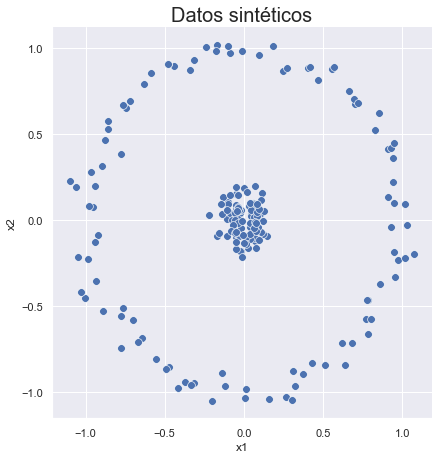

In [3]:
ndata = 200
X, y, custom_palette, kclust = get_dataset('dona', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, palette=custom_palette, s=60, height=6)
plt.title('Datos sintéticos', fontsize=20)

In [70]:
def grupo_1(dataInput, nCluster, method):
    listClusterMember = [[] for i in range(nCluster)]
    shuffledDataIn = dataInput
    np.random.shuffle(shuffledDataIn)
    for i in range(0, dataInput.shape[0]):
        listClusterMember[i%nCluster].append(dataInput[i,:])
    return listClusterMember

def RbfKernel(data1, data2, sigma):
    delta =abs(np.subtract(data1, data2))
    squaredEuclidean = (np.square(delta).sum(axis=1))
    result = np.exp(-(squaredEuclidean)/(2*sigma**2))
    return result

def thirdTerm(memberCluster):
    result = 0
    for i in range(0, memberCluster.shape[0]):
        for j in range(0, memberCluster.shape[0]):
            result = result + RbfKernel(memberCluster[i, :], memberCluster[j, :], var)
    result = result / (memberCluster.shape[0] ** 2)
    return result

def secondTerm(dataI, memberCluster):
    result = 0
    for i in range(0, memberCluster.shape[0]):
        result = result + RbfKernel(dataI, memberCluster[i,:], var)
    result = 2 * result / memberCluster.shape[0]
    return result

In [71]:
def kMeansKernel(data, grupo):
    global iterationCounter
    memberInit = grupo_1(data, k, grupo)
    nCluster = memberInit.__len__()
    #looping until converged
    while(True):
        # calculate centroid, only for visualization purpose
        centroid = np.ndarray(shape=(0, data.shape[1]))
        for i in range(0, nCluster):
            memberCluster = np.asmatrix(memberInit[i])
            centroidCluster = memberCluster.mean(axis=0)
            centroid = np.concatenate((centroid, centroidCluster), axis=0)
        #oldTime = np.around(time.time(), decimals=0)
        kernelResultClusterAllCluster = np.ndarray(shape=(data.shape[0], 0))
        #assign data to cluster whose centroid is the closest one
        for i in range(0, nCluster):
            term3 = thirdTerm(np.asmatrix(memberInit[i]))
            matrixTerm3 = np.repeat(term3, data.shape[0], axis=0); matrixTerm3 = np.asmatrix(matrixTerm3)
            matrixTerm2 = np.ndarray(shape=(0,1))
            for j in range(0, data.shape[0]): #repeat for all data
                term2 = secondTerm(data[j,:], np.asmatrix(memberInit[i]))
                matrixTerm2 = np.concatenate((matrixTerm2, term2), axis=0)
            matrixTerm2 = np.asmatrix(matrixTerm2)
            kernelResultClusterI = np.add(-1*matrixTerm2, matrixTerm3)
            kernelResultClusterAllCluster =\
                np.concatenate((kernelResultClusterAllCluster, kernelResultClusterI), axis=1)
        clusterMatrix = np.ravel(np.argmin(np.matrix(kernelResultClusterAllCluster), axis=1))
        listClusterMember = [[] for l in range(k)]
        for i in range(0, data.shape[0]):#assign data to cluster regarding cluster matrix
            listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])
        #break when converged
        boolAcc = True
        for m in range(0, nCluster):
            prev = np.asmatrix(memberInit[m])
            current = np.asmatrix(listClusterMember[m])
            if (prev.shape[0] != current.shape[0]):
                boolAcc = False
                break
            if (prev.shape[0] == current.shape[0]):
                boolPerCluster = (prev == current).all()
            boolAcc = boolAcc and boolPerCluster
            if(boolAcc==False):
                break
        if(boolAcc==True):
            break
        iterationCounter += 1
        #update new cluster member
        memberInit = listClusterMember
        #newTime = np.around(time.time(), decimals=0)
    return listClusterMember#, centroid

In [72]:
k = 2 #number of cluster
var = 1/2 #var in RFB kernel
iterationCounter = 0
input = X
grupo = "random" #options = random, byCenterDistance, byOriginDistance
clusterResult= kMeansKernel(input, grupo)#, initMethod)

<ipython-input-71-ef7f86873ebe>:30: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])


Realizamos la respectiva grafica para observar el resultado de la implementación

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


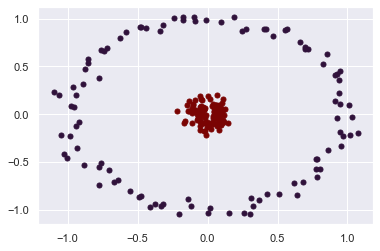

In [73]:
n = clusterResult.__len__()
color = iter(cm.turbo(np.linspace(0, 1, n)))
plt.clf()
for i in range(n):
    col = next(color)
    memberCluster = np.asmatrix(clusterResult[i])
    plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]), marker=".", s=100, c=col)
color = iter(cm.turbo(np.linspace(0, 1, n)))
plt.show(block=True)

In [74]:
data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']  

## K-means

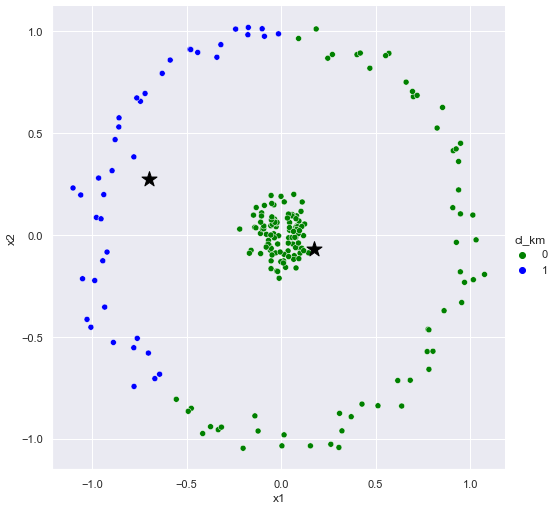

In [75]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = kmeans.fit_predict(X)

data_toy_km = pd.DataFrame(data_toy).assign(cl_km = y_km)

custom_palette = ["green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_km, hue='cl_km', height=7, palette = custom_palette,
           legend = 'brief')

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
) 
#plt.legend(scatterpoints=1)
plt.show()

## fuzzy k-means

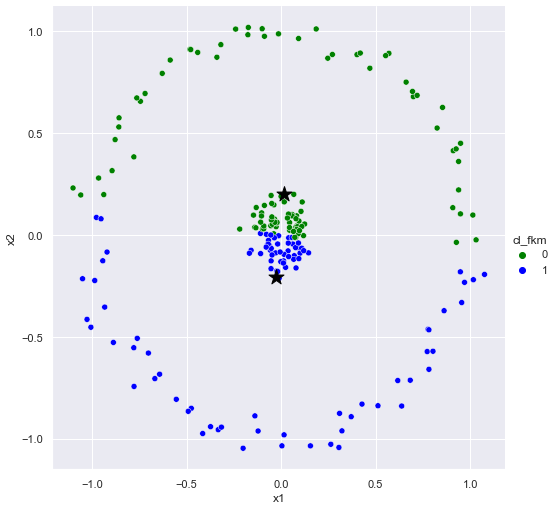

In [76]:
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans
# m es el parámetro de fuzyness
fuzzy_kmeans = FuzzyKMeans(k=2, m=2)
fuzzy_kmeans.fit(X)
#dir(fuzzy_kmeans)
res = pd.DataFrame(np.round(fuzzy_kmeans.fuzzy_labels_,2)).assign(label=fuzzy_kmeans.labels_)
#print(res.to_string())
data_toy_fkm = pd.DataFrame(data_toy).assign(cl_fkm = fuzzy_kmeans.labels_)

custom_palette = ["green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_fkm, hue='cl_fkm', height=7, palette = custom_palette,
           legend = 'brief')

# plot the centroids
plt.scatter(
    fuzzy_kmeans.cluster_centers_[:, 0], fuzzy_kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
#plt.legend(scatterpoints=1)
plt.show()

## Spectral clustering

<AxesSubplot:title={'center':'Spectral clustering'}, xlabel='x1', ylabel='x2'>

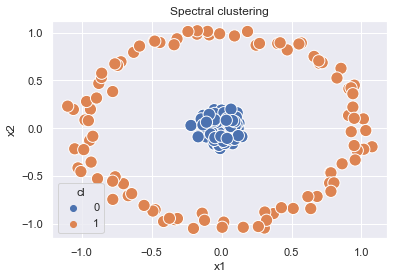

In [77]:
knn = 8 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150,legend = 'brief')

Extra

Text(0.5, 1.0, 'Datos sintéticos')

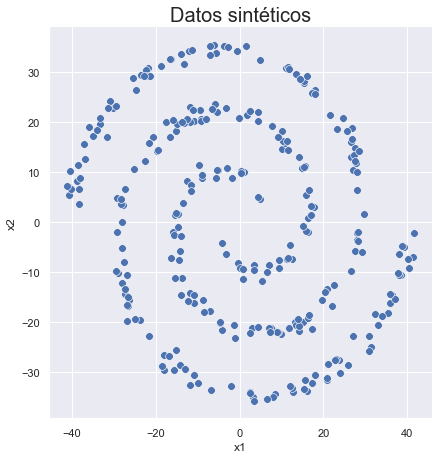

In [78]:
ndata = 150
X, y, custom_palette, kclust = get_dataset('spirals', ndata)

data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']
data_toy = pd.DataFrame(data_toy).assign(cl = y)
sns.relplot(x='x1', y='x2', data = data_toy, palette=custom_palette, s=60, height=6)
plt.title('Datos sintéticos', fontsize=20)

In [79]:
k = 2 #number of cluster
var = 1.414213 #var in RFB kernel
iterationCounter = 0
input = X
grupo = "random" #options = random, byCenterDistance, byOriginDistance
clusterResult= kMeansKernel(input, grupo)#, initMethod)

<ipython-input-71-ef7f86873ebe>:30: DeprecationWarning: np.asscalar(a) is deprecated since NumPy v1.16, use a.item() instead
  listClusterMember[np.asscalar(clusterMatrix[i])].append(data[i,:])


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


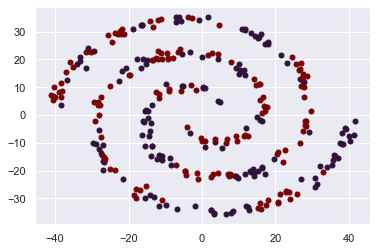

In [80]:
n = clusterResult.__len__()
color = iter(cm.turbo(np.linspace(0, 1, n)))
plt.clf()
for i in range(n):
    col = next(color)
    memberCluster = np.asmatrix(clusterResult[i])
    plt.scatter(np.ravel(memberCluster[:, 0]), np.ravel(memberCluster[:, 1]), marker=".", s=100, c=col)
color = iter(cm.turbo(np.linspace(0, 1, n)))
plt.show(block=True)

In [81]:
data_toy = pd.DataFrame(X)
data_toy.columns = ['x1','x2']  

## k-means

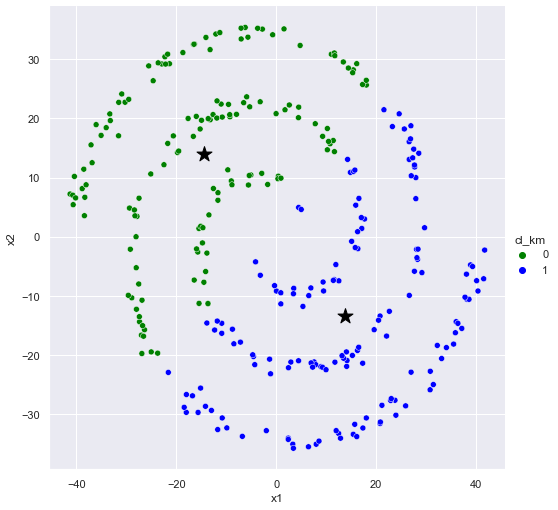

In [82]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
y_km = kmeans.fit_predict(X)

data_toy_km = pd.DataFrame(data_toy).assign(cl_km = y_km)

custom_palette = ["green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_km, hue='cl_km', height=7, palette = custom_palette,
           legend = 'brief')

# plot the centroids
plt.scatter(
    kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
) 
#plt.legend(scatterpoints=1)
plt.show()

## fuzzy k-means

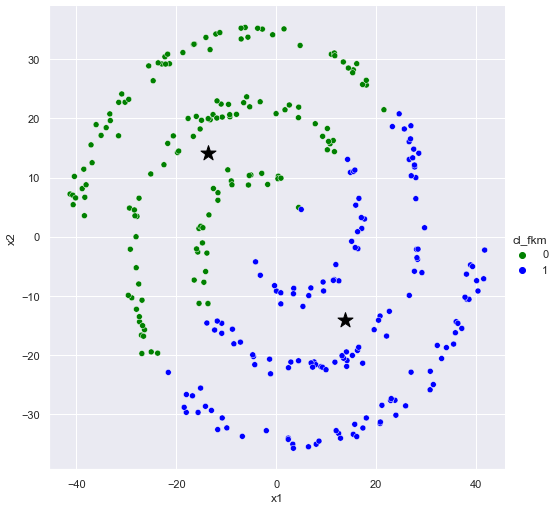

In [83]:
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans
# m es el parámetro de fuzyness
fuzzy_kmeans = FuzzyKMeans(k=2, m=2)
fuzzy_kmeans.fit(X)
#dir(fuzzy_kmeans)
res = pd.DataFrame(np.round(fuzzy_kmeans.fuzzy_labels_,2)).assign(label=fuzzy_kmeans.labels_)
#print(res.to_string())
data_toy_fkm = pd.DataFrame(data_toy).assign(cl_fkm = fuzzy_kmeans.labels_)

custom_palette = ["green", "blue"]
sns.relplot(x='x1', y='x2', data = data_toy_fkm, hue='cl_fkm', height=7, palette = custom_palette,
           legend = 'brief')

# plot the centroids
plt.scatter(
    fuzzy_kmeans.cluster_centers_[:, 0], fuzzy_kmeans.cluster_centers_[:, 1],
    s=250, marker='*',
    c='black', edgecolor='black',
    label='centroids'
)
#plt.legend(scatterpoints=1)
plt.show()

## Spectral clustering

<AxesSubplot:title={'center':'Spectral clustering'}, xlabel='x1', ylabel='x2'>

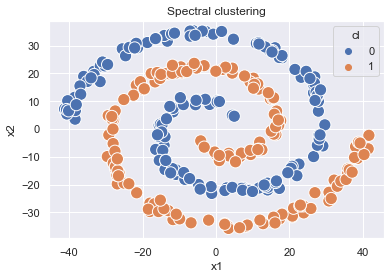

In [85]:
knn = 10 # k-vecinos cercanos para la construcción del grafo
sigma = 1.5 # sigma del Kernel Gaussiano
lflag = 'rw' # Tipo de Laplaciano
indices, knn_graph = graph(X,knn,mutual=False)
W = adjacency_matrix(X, knn_graph, sigma, True)
L, D = laplacian(W, flag=lflag)
vals, vecs, vecs_k = eigen_Lap(L,kclust,lflag)

kmeans = cluster.KMeans(n_clusters=kclust, init='random',random_state=0)
y_km = kmeans.fit_predict(vecs_k)
data_km = pd.DataFrame(dict(x1=X[:,0],x2=X[:,1],cl = y_km))
plt.title('Spectral clustering')
sns.scatterplot(x='x1', y='x2', data = data_km, hue='cl', s=150,legend = 'brief')